<a href="https://colab.research.google.com/github/clzndyal1/git_test/blob/master/16_1_Deep_Learning_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical  #one-hot encoding과 같은 결과 반환


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [18]:
#mnist 데이터셋 로드

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
#CNN을 실행하기 위해 데이터 reshape()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [20]:
#CNN 신경망 설정
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))  #커널갯수:32, 사이즈 (3,3)
model.add(Conv2D(64, (3, 3), activation='relu'))  #커널 64개
model.add(MaxPooling2D(pool_size=(2,2)))    #풀링 사이즈는 (2,2) -> 50% 줄어든다.
model.add(Dropout(0.25))    #노드를 25% 꺼줌(계산 안함)
#Dense 실행 -> 1차원으로 데이터 타입을 변경
model.add(Flatten())    #(28, 28, 1) -> (28 * 28 * 1)로 변경
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1179776   
                                                      

In [21]:
#모델 컴파일, 실행
#딥러닝 모델 실행
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model 최적화를 위한 설정
model_path='./data/model/MNIST_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
hist = model.fit(X_train, y_train, epochs=2000, validation_split=0.25, batch_size=200, verbose=0,
                 callbacks=[early_stopping, checkpointer])

#테스트 정확도 출력
print('Test accuracy : ', model.evaluate(X_test, y_test)[1])


Epoch 1: val_loss improved from inf to 0.07094, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07094 to 0.05749, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05749 to 0.05416, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05416 to 0.04365, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04365 to 0.04276, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04276

Epoch 7: val_loss did not improve from 0.04276

Epoch 8: val_loss improved from 0.04276 to 0.04046, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.04046

Epoch 10: val_loss improved from 0.04046 to 0.04018, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 11: val_loss improved from 0.04018 to 0.03866, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 12: val_loss did not improve from 0.03866

Epoch 13: val_loss did not impro

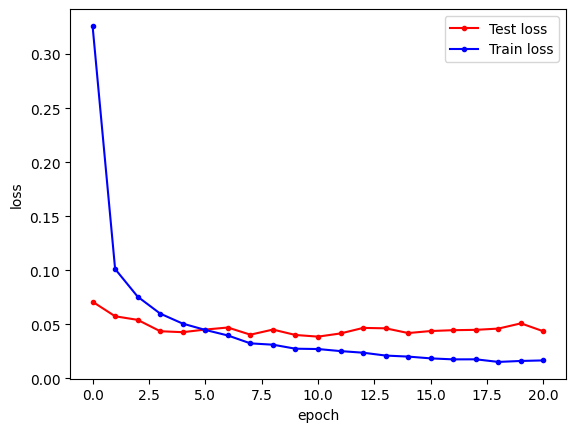

In [22]:
#실행된 결과를 그래프로 표현

y_vloss = hist.history['val_loss']   #검증된 자료의 오차
y_loss = hist.history['loss']    #학습셋의 오차

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='r', label='Test loss')
plt.plot(x_len, y_loss, marker='.', c='b', label='Train loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

1/1 [==============================] - 0s 35ms/step
[[4.1791193e-13 5.6285801e-12 2.9891180e-11 2.8099739e-10 2.7082820e-16
  5.6524275e-17 5.1880768e-21 1.0000000e+00 3.4526516e-13 1.7495954e-09]] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


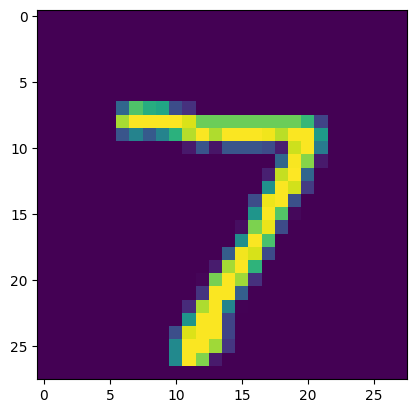

In [25]:
#X_test의 처음 이미지의 클래스 확인
print(model.predict(X_test[0].reshape(1,28,28,1)), y_test[0])

plt.imshow(X_test[0])
plt.show()